In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import math

In [72]:
set_folder = "Set8"

In [73]:
content = Image.open("Sets/"+set_folder+"/content.jpg")
style = Image.open("Sets/"+set_folder+"/style.png")

In [74]:
content_np = np.array(content)
style_np = np.array(style)

In [75]:
def find_ratio(content, style):
    return content.shape[1]/content.shape[0], style.shape[1]/style.shape[0] #length/height

In [76]:
c, s = find_ratio(content_np, style_np)

In [77]:
print(c,s)

1.0822510822510822 1.6018306636155606


## Resizing Style Image (Centre Crop) to match content

In [78]:
def crop_style(image, ratio_con, ratio_style):
    global style
    h = image.shape[0]
    l = image.shape[1]
    nh = image.shape[0]
    nl = image.shape[1]
    new_r = ratio_style
    if ratio_con > ratio_style:
        while np.abs(new_r-ratio_con) > 0.001:
            nh -= 0.05
            new_r = nl/nh
            print(new_r)
    else:
        while np.abs(new_r-ratio_con) > 0.001:
            nl -= 0.05
            new_r = nl/nh
            print(new_r)
    nh, nl = round(nh, 2), round(nl, 2)
    
    # Crop Image
    style = style.crop(box = [(l-nl)//2, (h-nh)//2, l - (l-nl)//2, h - (h-nh)//2])

In [79]:
if np.abs(c-s) > 0.6:
    print("Incompatible. Resizing will result in loss of style data.")
elif c == s:
    pass
else:
    crop_style(style_np, c, s)

1.6017162471395883
1.6016018306636157
1.6014874141876434
1.6013729977116709
1.6012585812356985
1.601144164759726
1.6010297482837537
1.6009153318077811
1.6008009153318088
1.6006864988558362
1.600572082379864
1.6004576659038914
1.600343249427919
1.6002288329519465
1.6001144164759742
1.6000000000000016
1.5998855835240293
1.5997711670480568
1.5996567505720845
1.599542334096112
1.5994279176201396
1.599313501144167
1.5991990846681947
1.5990846681922222
1.5989702517162498
1.5988558352402773
1.598741418764305
1.5986270022883324
1.5985125858123599
1.5983981693363876
1.598283752860415
1.5981693363844427
1.5980549199084702
1.5979405034324978
1.5978260869565253
1.597711670480553
1.5975972540045804
1.597482837528608
1.5973684210526355
1.5972540045766632
1.5971395881006907
1.5970251716247184
1.5969107551487458
1.5967963386727735
1.596681922196801
1.5965675057208286
1.596453089244856
1.5963386727688837
1.5962242562929112
1.5961098398169389
1.5959954233409663
1.595881006864994
1.5957665903890215
1.595

1.4112128146454823
1.4110983981695098
1.4109839816935374
1.410869565217565
1.4107551487415926
1.41064073226562
1.4105263157896477
1.4104118993136752
1.4102974828377028
1.4101830663617303
1.410068649885758
1.4099542334097854
1.409839816933813
1.4097254004578406
1.4096109839818682
1.4094965675058957
1.4093821510299234
1.4092677345539508
1.4091533180779785
1.409038901602006
1.4089244851260336
1.408810068650061
1.4086956521740888
1.4085812356981162
1.408466819222144
1.4083524027461714
1.408237986270199
1.4081235697942265
1.4080091533182542
1.4078947368422816
1.4077803203663093
1.4076659038903367
1.4075514874143644
1.4074370709383919
1.4073226544624196
1.407208237986447
1.4070938215104747
1.4069794050345021
1.4068649885585298
1.4067505720825573
1.406636155606585
1.4065217391306124
1.40640732265464
1.4062929061786675
1.4061784897026952
1.4060640732267227
1.4059496567507503
1.4058352402747778
1.4057208237988053
1.405606407322833
1.4054919908468604
1.405377574370888
1.4052631578949155
1.405148

1.3540045766592643
1.3538901601832918
1.3537757437073195
1.353661327231347
1.3535469107553746
1.353432494279402
1.3533180778034297
1.3532036613274572
1.3530892448514849
1.3529748283755123
1.35286041189954
1.3527459954235674
1.3526315789475951
1.3525171624716226
1.3524027459956502
1.3522883295196777
1.3521739130437054
1.3520594965677328
1.3519450800917605
1.351830663615788
1.3517162471398156
1.351601830663843
1.3514874141878708
1.3513729977118982
1.351258581235926
1.3511441647599534
1.351029748283981
1.3509153318080085
1.3508009153320362
1.3506864988560636
1.3505720823800913
1.3504576659041188
1.3503432494281464
1.3502288329521739
1.3501144164762016
1.350000000000229
1.3498855835242567
1.3497711670482841
1.3496567505723118
1.3495423340963393
1.349427917620367
1.3493135011443944
1.349199084668422
1.3490846681924495
1.3489702517164772
1.3488558352405047
1.3487414187645324
1.3486270022885598
1.3485125858125873
1.348398169336615
1.3482837528606424
1.34816933638467
1.3480549199086975
1.34794

1.1995423340964757
1.1994279176205034
1.1993135011445308
1.1991990846685585
1.199084668192586
1.1989702517166136
1.198855835240641
1.1987414187646688
1.1986270022886962
1.1985125858127237
1.1983981693367514
1.1982837528607788
1.1981693363848065
1.198054919908834
1.1979405034328616
1.197826086956889
1.1977116704809168
1.1975972540049442
1.1974828375289719
1.1973684210529993
1.197254004577027
1.1971395881010545
1.1970251716250822
1.1969107551491096
1.1967963386731373
1.1966819221971647
1.1965675057211924
1.1964530892452199
1.1963386727692475
1.196224256293275
1.1961098398173027
1.1959954233413301
1.1958810068653578
1.1957665903893853
1.195652173913413
1.1955377574374404
1.195423340961468
1.1953089244854955
1.1951945080095232
1.1950800915335507
1.1949656750575783
1.1948512585816058
1.1947368421056335
1.194622425629661
1.1945080091536886
1.194393592677716
1.1942791762017437
1.1941647597257712
1.1940503432497989
1.1939359267738263
1.193821510297854
1.1937070938218814
1.1935926773459091
1.19

1.125286041190312
1.1251716247143395
1.125057208238367
1.1249427917623944
1.1248283752864219
1.1247139588104493
1.1245995423344768
1.124485125858504
1.1243707093825315
1.124256292906559
1.1241418764305864
1.1240274599546138
1.1239130434786413
1.1237986270026687
1.1236842105266962
1.1235697940507237
1.1234553775747511
1.1233409610987786
1.1232265446228058
1.1231121281468333
1.1229977116708607
1.1228832951948882
1.1227688787189156
1.122654462242943
1.1225400457669705
1.122425629290998
1.1223112128150254
1.122196796339053
1.1220823798630801
1.1219679633871076
1.121853546911135
1.1217391304351625
1.12162471395919
1.1215102974832174
1.1213958810072449
1.1212814645312723
1.1211670480552998
1.1210526315793272
1.1209382151033547
1.120823798627382
1.1207093821514094
1.1205949656754368
1.1204805491994643
1.1203661327234917
1.1202517162475192
1.1201372997715466
1.120022883295574
1.1199084668196015
1.119794050343629
1.1196796338676565
1.1195652173916837
1.1194508009157111
1.1193363844397386
1.1192

In [80]:
content = content.resize(style.size, resample=Image.LANCZOS)

In [81]:
content.size

(474, 437)

In [82]:
style.size

(474, 437)

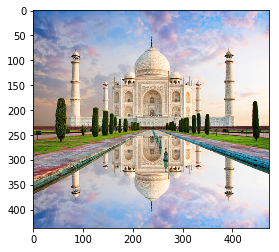

In [83]:
plt.imshow(np.asarray(content))

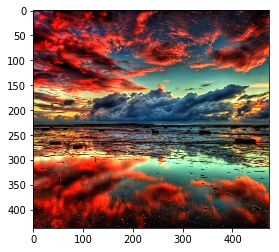

In [84]:
plt.imshow(np.asarray(style))

In [85]:
content.save("UpdatedSets/"+set_folder+"/content.jpg")
style.save("UpdatedSets/"+set_folder+"/style.png")